# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [170]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
import matplotlib.animation as animation
from matplotlib.widgets import Slider

import numpy as np
import scipy.stats as stats

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

n1, n2 = 100, 1000

plt_names = ['Normal', 'Gamma', 'Exponential', 'Uniform']
plt_colors = ['blue', 'orange', 'green', 'red']
plt_colors_a = ['navy', 'darkgoldenrod', 'darkgreen', 'darkred']

ds = [x1, x2, x3, x4]

bins_me = [np.arange(np.floor(xi.min()), np.ceil(xi.max()),.5) for xi in ds]

<IPython.core.display.Javascript object>


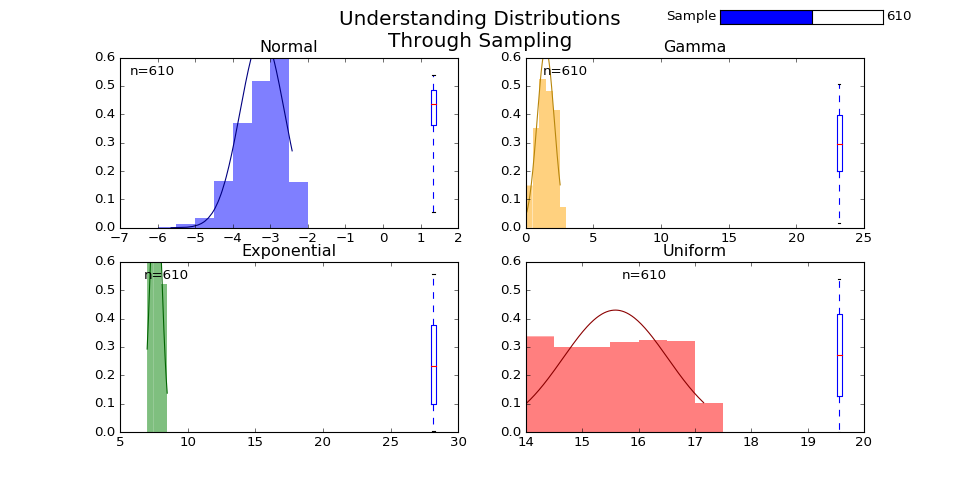

In [166]:
fig2, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey='row', figsize=(12,6))

axs = [ax1,ax2,ax3,ax4]
amp_slider_ax  = fig2.add_axes([0.75, 0.95, 0.17, 0.03], axisbg='w')
samp = Slider(amp_slider_ax, 'Sample', 100, 1000, valinit=n1, valfmt='%0.0f')

bplt = []
for i, ax in enumerate(axs):
    bplt.append(mpl_il.inset_axes(ax, width='10%', height='100%', loc=5))
    bplt[i].axis('off')

In [167]:
# create the function that will do the plotting, where curr is the current frame
def update_a(curr):

    # check if animation is at the last frame, and if so, stop the animation a
    if curr >= n2/10:
        a.event_source.stop()
    

    for i, ax in enumerate(axs):
        h = ds[i][n1:n1+curr*10]
        hs = h[:]
        hs.sort()
        ax.clear()
        ax.hist(h, normed=True,\
                bins=bins_me[i], alpha=0.5,\
                color = plt_colors[i],\
               edgecolor='none')
        if curr > 2:
            bplt[i].clear()
            bplt[i].boxplot(h, whis='range')
            bplt[i].axis('off')
            
            hmean = np.mean(h)
            hstd = np.std(h)
            pdf = stats.norm.pdf(h, hmean, hstd)
            ax.plot(h, pdf, color = plt_colors_a[i])
            
            #bplt.margins(x=0.5)
        
        ax.set_title(plt_names[i])
        ax.set_ylim(0, .6)
        samp.set_val(n1+curr*10)
        ax.annotate('n={:}'.format(100+10*curr),\
                   (abs(.1*np.median(ax.get_xlim()))+ax.get_xlim()[0],\
                    .90*ax.get_ylim()[-1]))

In [168]:
aa = animation.FuncAnimation(fig2, update_a, interval=1)

In [169]:
fig2.subplots_adjust(top=0.88)
fig2.suptitle('Understanding Distributions\nThrough Sampling', fontsize=18)
multi = MultiCursor(fig2.canvas, axs, color='r', lw=1,
horizOn=False, vertOn=True)
plt.show()